In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import pickle

In [13]:
data=pd.read_csv("../data/learning_progress_expanded.csv")

In [14]:
data.head()

,difficulty,response_time,correct,streak,next_level
0,2,5.6,1,1,2
1,1,4.2,0,0,2
2,3,9.1,1,2,3
3,2,7.8,1,3,3
4,1,6.3,0,0,2


In [15]:
X = data[["difficulty", "response_time", "correct", "streak"]]
y = data["next_level"]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [33]:
y_pred=model.predict(X_test)
y_pred

array([2, 2, 3, 1, 3, 2, 1, 2, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2,
       3, 2, 2, 2, 3, 2, 1, 2, 3, 2, 2, 3, 3, 1, 3, 3, 3, 1, 2, 2, 3, 3,
       2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 1, 3, 2, 3, 3, 3, 1, 2, 2, 3,
       2, 3, 3, 2, 3, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 3, 3, 1, 1, 1, 2, 3,
       3, 3, 1, 3, 3, 2, 3, 3, 2, 3, 3, 2])

In [36]:
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.60      0.67        20
           2       0.84      0.84      0.84        43
           3       0.85      0.95      0.90        37

    accuracy                           0.83       100
   macro avg       0.81      0.79      0.80       100
weighted avg       0.83      0.83      0.83       100



In [ ]:
# !pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp311-cp311-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 4.8 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 5.0 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.1 MB 4.4 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 4.3 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 4.3 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 4.1 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 M

Text(0.5, 1.0, 'Feature Importances')

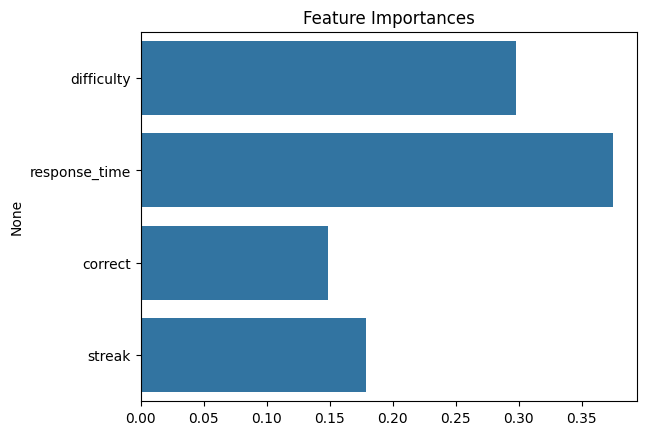

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
feature_importances = model.feature_importances_
features = X.columns
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importances")


<Axes: >

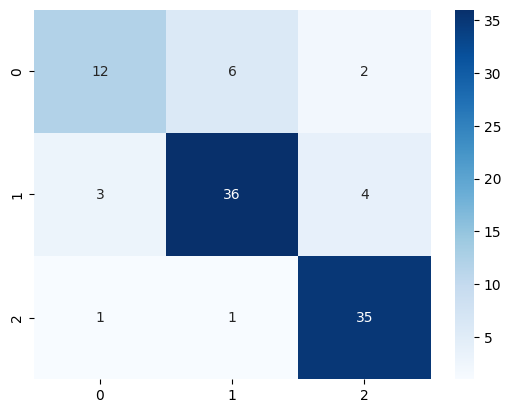

In [41]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, fmt='d', cmap='Blues')

In [ ]:

with open("../artifacts/level_recommender_model.pkl", "wb") as f:
    pickle.dump(model, f)
    
    

In [23]:
model_loaded = pickle.load(open("../artifacts/level_recommender_model.pkl", "rb"))
def recommend_next_level(difficulty, correct, response_time, streak):
    input_data = pd.DataFrame([{
        "difficulty": difficulty,
        "response_time": response_time,
        "correct": correct,
        "streak": streak
    }])
    predicted_level = model_loaded.predict(input_data)[0]
    return predicted_level


In [ ]:
test_value=recommend_next_level(2, 1, 4.5, 2)  
print(test_value) 

3


<!-- Optimizing and Generalizing the model -->

In [55]:
model=RandomForestClassifier()

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [15,20,50],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [10,15,20] 
}

In [57]:
gridsearchcv=GridSearchCV(estimator=model, param_grid=param_grid, cv=8, n_jobs=1, verbose=2)
gridsearchcv.fit(X_train, y_train)  
gridsearchcv.best_params_

Fitting 8 folds for each of 36 candidates, totalling 288 fits
[CV] END .max_depth=5, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END .max_depth=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END .max_depth=5, min_samples_split=10, n_

{'max_depth': 5, 'min_samples_split': 20, 'n_estimators': 20}

In [59]:
model=RandomForestClassifier(min_samples_split=20,n_estimators=20,max_depth=5)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test, y_pred)

0.83

In [60]:
with open("../artifacts/level_recommender_model.pkl", "wb") as f:
    pickle.dump(model, f)
    